In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("secondhanddataset.csv")

# Assume target column is the last column
target_column = df.columns[-1]
X = df.drop(columns=[target_column])
y = df[target_column]

# Normalize target
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Convert to tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define PyTorch MLP model
class MLP_Torch(nn.Module):
    def __init__(self, input_size):
        super(MLP_Torch, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.leaky_relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Train PyTorch model
model_torch = MLP_Torch(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.0005)

for epoch in range(200):
    optimizer.zero_grad()
    outputs = model_torch(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Evaluate PyTorch model
y_pred_torch = model_torch(X_test_torch).detach().numpy()
y_pred_torch = scaler_y.inverse_transform(y_pred_torch)  # Convert back to original scale
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

print("PyTorch Model Evaluation:")
print("MSE:", mean_squared_error(y_test_original, y_pred_torch))
print("RMSE:", np.sqrt(mean_squared_error(y_test_original, y_pred_torch)))
print("R-Squared:", r2_score(y_test_original, y_pred_torch))

# Define TensorFlow model
model_tf = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='leaky_relu'),
    keras.layers.Dense(64, activation='leaky_relu'),
    keras.layers.Dense(1)
])

early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model_tf.compile(optimizer='adam', loss='mse')
model_tf.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, callbacks=[early_stopping])

# Evaluate TensorFlow model
y_pred_tf = model_tf.predict(X_test)
y_pred_tf = scaler_y.inverse_transform(y_pred_tf)

print("\nTensorFlow Model Evaluation:")
print("MSE:", mean_squared_error(y_test_original, y_pred_tf))
print("RMSE:", np.sqrt(mean_squared_error(y_test_original, y_pred_tf)))
print("R-Squared:", r2_score(y_test_original, y_pred_tf))

# Explanation of Equations
explanation = """
Mean Squared Error (MSE):
MSE = (1/n) * sum((y_true - y_pred)^2)

Root Mean Squared Error (RMSE):
RMSE = sqrt(MSE)

R-Squared:
R^2 = 1 - (SS_res / SS_tot)
where SS_res = sum((y_true - y_pred)^2)
and SS_tot = sum((y_true - mean(y_true))^2)
"""
print(explanation)


Epoch 0, Loss: 0.29398682713508606
Epoch 20, Loss: 0.05522685870528221
Epoch 40, Loss: 0.011974853463470936
Epoch 60, Loss: 0.004316267557442188
Epoch 80, Loss: 0.003382854163646698
Epoch 100, Loss: 0.0028030683752149343
Epoch 120, Loss: 0.0024136160500347614
Epoch 140, Loss: 0.002116738585755229
Epoch 160, Loss: 0.0018766444409266114
Epoch 180, Loss: 0.0016755438409745693
PyTorch Model Evaluation:
MSE: 733428481.698305
RMSE: 27081.884751588193
R-Squared: 0.9563720383097327
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

TensorFlow Model Evaluation:
MSE: 525402420.4211941
RMSE: 22921.658326159435
R-Squared: 0.9687464596179418

Mean Squared Error (MSE):
MSE = (1/n) * sum((y_true - y_pred)^2)

Root Mean Squared Error (RMSE):
RMSE = sqrt(MSE)

R-Squared:
R^2 = 1 - (SS_res / SS_tot)
where SS_res = sum((y_true - y_pred)^2)
and SS_tot = sum((y_true - mean(y_true))^2)



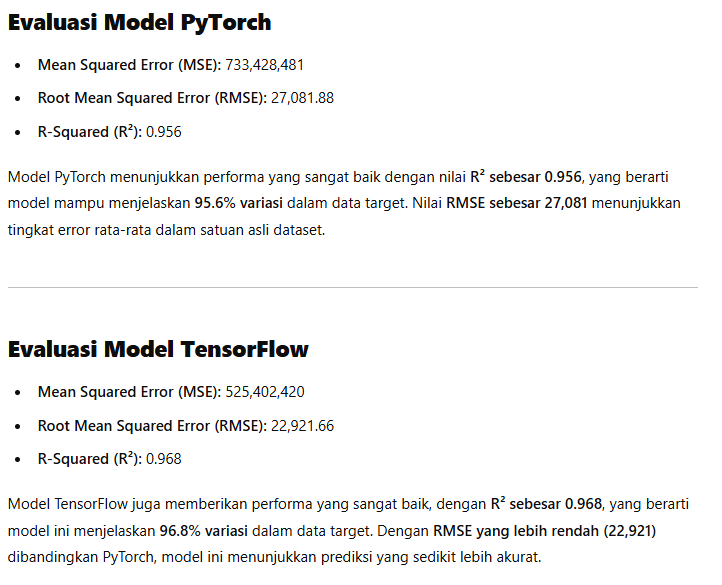

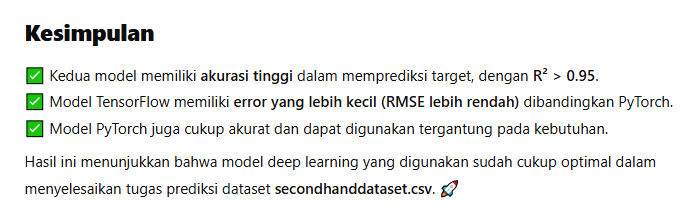

**Persamaan Matematika**

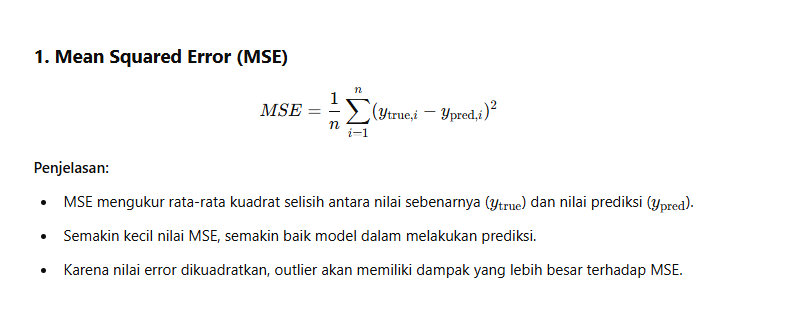

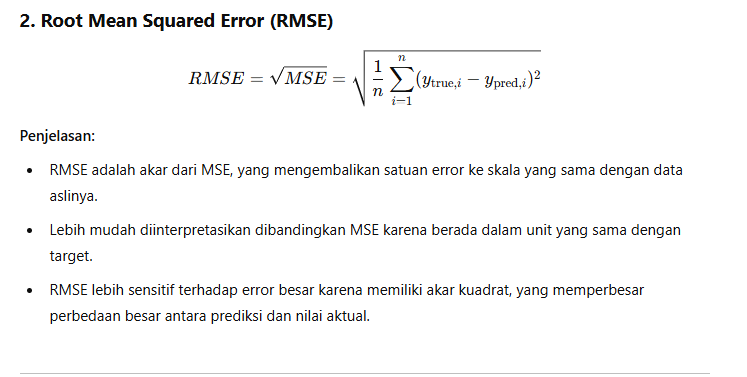

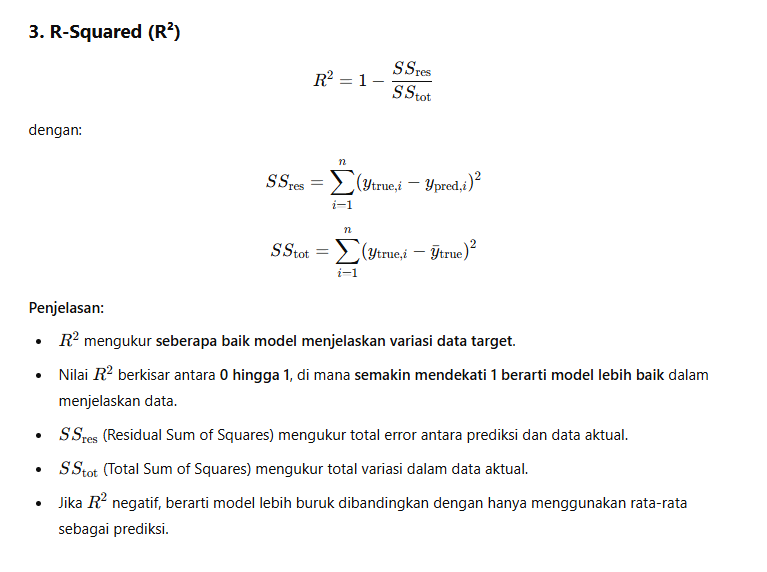